In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# WHEN DO WE CHOOSE CLASSIFICATION
# ---> WHEN THE TARGET VARIABLE IS BINARY CLASSIFICATION --> 2 CLASSES (YES/NO)   ---> SIGMOID ACTIVATION FUNCTION
# ---> WHEN THE TARGET VARIABLE IS MULTI CLASSES ---> GREATER THAN 2 CLASSES (EG. TYPE OF ANIMAL)  ---> SOFT MAX ACTIVATION FUNCTION

In [3]:
df = pd.read_csv('/content/4_cancer_classification.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

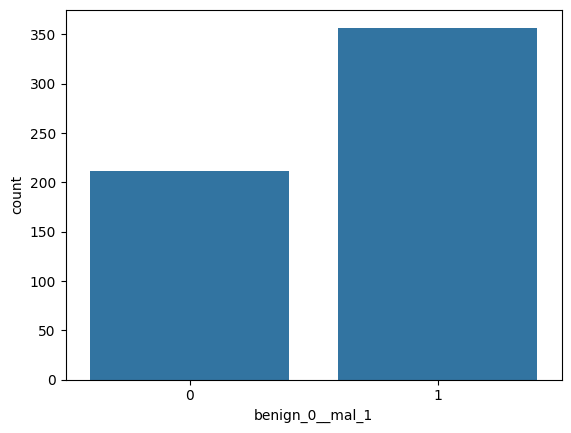

In [8]:
import seaborn as sns
sns.countplot(x='benign_0__mal_1', data=df)

In [9]:
t2 = df['benign_0__mal_1'].value_counts()
t2

,count
benign_0__mal_1,
1,357
0,212


<Axes: xlabel='benign_0__mal_1'>

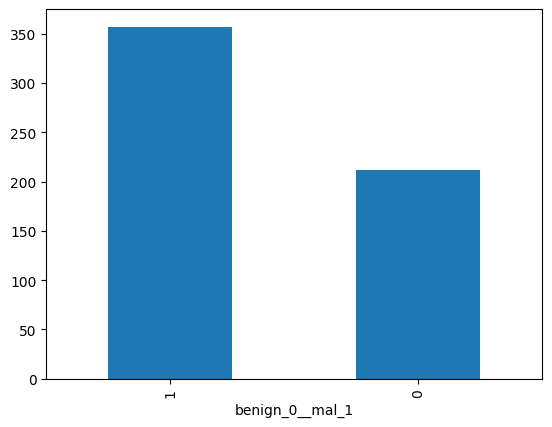

In [10]:
# CONSTRUCT THE BAR GRAPH

t2.plot(kind='bar')

<Axes: >

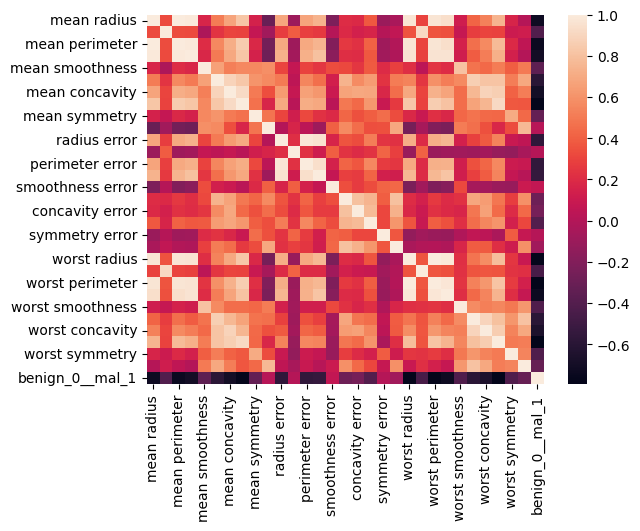

In [11]:
# CONSTRUCT THE HEAP MAP
sns.heatmap(df.corr())

In [12]:
df.corr()['benign_0__mal_1'].sort_values()

,benign_0__mal_1
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


In [13]:
Y = df['benign_0__mal_1']
X = df.drop('benign_0__mal_1',axis=1)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_X = MM.fit_transform(X)
MM_X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(MM_X,Y,test_size=0.25,random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [17]:
# BEFORE HIDDEN LAYER, APPLY RELU ACTIVATION FUNCTION AS THE OUTPUT OF THE INPUT LAYER AND
# INPUT TO THE HIDDEN LAYER IS CONTINUOUS DATA

# AFTER HIDDEN LAYER, APPLY SIGMOID ACTIVATION FUNCTION AS THE OUTPUT OF THE HIDDEN LAYER AND
# INPUT TO THE OUTPUT LAYER SHOULD BE BINARY DATA(0/1)

model = Sequential()

# INPUT LAYER
model.add(Dense(units=30))
# HIDDEN LAYER
model.add(Dense(units=45,activation='relu'))
# OUTPUT LAYER
model.add(Dense(units=1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam')

# FOR BINARY CLASSIFICATION, THE ERROR IS LOG LOSS/BINARY CROSS ENTROPY
# FOR MULTICLASS CLASSIFICATION, THE ERROR(LOSS) IS MULTICLASS_CROSSENTROPY

In [19]:
model.fit(x = X_train, y = Y_train,epochs=500, validation_data=(X_test,Y_test),verbose=1)

"""
The verbose argument in the model.fit() function of TensorFlow's Keras API controls the level of information displayed
during the training process. Here's a breakdown of its different settings:

verbose Levels:
verbose=0 (silent): No output is printed during training. This is useful when you want to run training in the background
or don't need real-time updates.
verbose=1 (progress bar): This is the default setting. It displays a progress bar that shows the training progress for
each epoch. It includes information like epoch number, estimated time remaining, loss value, and some metrics (if specified).
"""

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.6819 - val_loss: 0.6214
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6186 - val_loss: 0.5503
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5608 - val_loss: 0.4828
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5026 - val_loss: 0.4189
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4450 - val_loss: 0.3590
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3906 - val_loss: 0.3051
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3530 - val_loss: 0.2641
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3038 - val_loss: 0.2299
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2794 - val_loss: 0.2065
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2435 - val_loss: 0.1841
Epoch 11/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2391 - val_loss: 0.1668
Epoch 12/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

"\nThe verbose argument in the model.fit() function of TensorFlow's Keras API controls the level of information displayed \nduring the training process. Here's a breakdown of its different settings:\n\nverbose Levels:\nverbose=0 (silent): No output is printed during training. This is useful when you want to run training in the background \nor don't need real-time updates.\nverbose=1 (progress bar): This is the default setting. It displays a progress bar that shows the training progress for \neach epoch. It includes information like epoch number, estimated time remaining, loss value, and some metrics (if specified).\n"

In [20]:
training_loss = model.history.history['loss']
test_loss = model.history.history['val_loss']

model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.670416,0.621447
1,0.606493,0.550338
2,0.548384,0.482769
3,0.487502,0.418862
4,0.434347,0.358984
...,...,...
495,0.022572,0.164101
496,0.015977,0.158303
497,0.014965,0.164341
498,0.015327,0.213945


<Axes: >

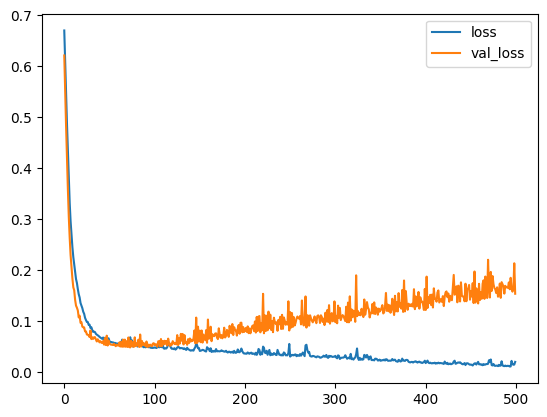

In [21]:
model_loss.plot()

In [22]:
# FINALLY HIGH VARIENCE EXISTED BETWEEN TRAINING ERROR AND TESTING ERROR, SO I NEED NOT TO RUN THESE MANY EPOCHS

# TO CONTROL THIS OVERFITTING,
# 1) LEARNING RATE
# 2) ADD HIDDEN LAYERS
# 3) CHANGE THE OPTIMIZER
# 4) CHANGE THE ACTIVATION LAYERS NOT AT THE OUTPUT LAYER

# (OR)

# EARLY STOPPING
# --------------
# IF THE TEST ERROR IS INCREASING AGAIN, IT WILL STOP THE MODEL FITTING IMMEDIATELY.
# EG. AFTER THE 50 TH ITERATION, TEST ERROR IS INCREASING ERROR, PATIENCE = 10
# 50 + 10 = 60 TH EPOCH WILL BE LAST STOP OF FITTING THE MODEL.

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [24]:
model.fit(x=X_train, y=Y_train, epochs=500, validation_data=(X_test,Y_test), verbose=1,callbacks=[early_stop])

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - val_loss: 0.1781
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - val_loss: 0.1660
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - val_loss: 0.1597
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - val_loss: 0.1966
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - val_loss: 0.1619
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.2109
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - val_loss: 0.2023
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.1701
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - val_loss: 0.1529
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - val_loss: 0.1993
Epoch 11/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - val_loss: 0.1629
Epoch 12/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.012444,0.178069
1,0.012145,0.166018
2,0.013154,0.159747
3,0.013899,0.196563
4,0.011192,0.161931
5,0.016424,0.210859
6,0.016388,0.202263
7,0.015082,0.170064
8,0.016819,0.152949
9,0.021189,0.199293


<Axes: >

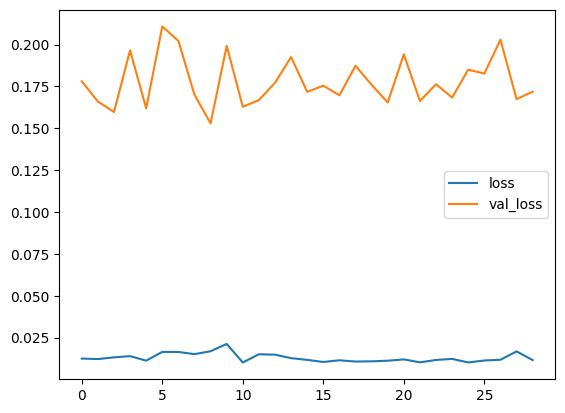

In [26]:
model_loss.plot()

In [27]:
Y_Pred_train = model.predict(X_train)
Y_Pred_train

Y_Pred_test = model.predict(X_test)
Y_Pred_test

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[9.8326063e-01],
       [1.2601117e-09],
       [8.5046404e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.4999827e-15],
       [1.3648872e-14],
       [8.4803021e-04],
       [1.7981389e-01],
       [1.0000000e+00],
       [9.9967861e-01],
       [2.1826296e-05],
       [9.9999976e-01],
       [2.8277088e-03],
       [9.9999928e-01],
       [4.3674631e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.4529998e-11],
       [9.9970025e-01],
       [9.9999255e-01],
       [1.2616621e-14],
       [9.9999529e-01],
       [9.9999923e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999845e-01],
       [9.9999970e-01],
       [3.5586381e-09],
       [9.9999893e-01],
       [1.0000000e+00],
       [9.9806887e-01],
       [9.9999928e-01],
       [9.9999988e-01],
       [9.9999392e-01],
       [4.1524295e-04],
       [9.5283222e-01],
       [9.0666482e-08],
       [9.9994481e-01],
       [1.0000000e+00],
       [2.351707

In [28]:
Y_Pred_train_final = (Y_Pred_train > 0.5).astype(int)
Y_Pred_train_final

Y_Pred_test_final = (Y_Pred_test > 0.5).astype(int)
Y_Pred_test_final

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy_score for Training ",accuracy_score(Y_train,Y_Pred_train_final))
print("Accuracy_score for Testing ",accuracy_score(Y_test,Y_Pred_test_final))

Accuracy_score for Training  0.9976525821596244
Accuracy_score for Testing  0.958041958041958


In [30]:
# NOW AFTER USING EARLYSTOPPING AND PATIENCE,

# VARIENCE IS LESS ---> MODEL IS NOT OVERFITTED.